# Análise de Títulos da Netflix
Análise com Pandas e Matplotlib


In [2]:
# Importação de bibliotecas
import pandas as pd  
import matplotlib.pyplot as plt 

In [3]:
# Carregando o dataset com tratamento de erro
try:
    df = pd.read_csv("../data/netflix_titles.csv")
    print("✅ Dados carregados com sucesso.")
except FileNotFoundError:
    print("❌ Arquivo não encontrado. Verifique o caminho.")

✅ Dados carregados com sucesso.


In [4]:
# Visualização básica dos dados
print("Formato (linhas, colunas):", df.shape)
print("\nInformações gerais:")
print(df.info())
df.head()

Formato (linhas, colunas): (8807, 12)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Estatísticas descritivas e valores nulos
df.describe(include='all')
df.isnull().sum() 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Limpeza de dados com contagem antes/depois
print("Antes da limpeza:", df.shape)
df.drop_duplicates(inplace=True)
df.dropna(subset=["type", "title", "country"], inplace=True)
print("Depois da limpeza:", df.shape)

Antes da limpeza: (8807, 12)
Depois da limpeza: (7976, 12)


In [7]:
# Análises iniciais
print("Número total de títulos:", len(df))
print("Quantidade por tipo:")
print(df['type'].value_counts())
print("\nProporção filmes vs séries:")
print(df['type'].value_counts(normalize=True))
print("\nFilme mais antigo:", df['release_year'].min())
print("\nGêneros mais comuns:")
print(df['listed_in'].value_counts().head())

Número total de títulos: 7976
Quantidade por tipo:
type
Movie      5691
TV Show    2285
Name: count, dtype: int64

Proporção filmes vs séries:
type
Movie      0.713516
TV Show    0.286484
Name: proportion, dtype: float64

Filme mais antigo: 1942

Gêneros mais comuns:
listed_in
Documentaries                                       343
Dramas, International Movies                        337
Stand-Up Comedy                                     303
Comedies, Dramas, International Movies              260
Dramas, Independent Movies, International Movies    243
Name: count, dtype: int64


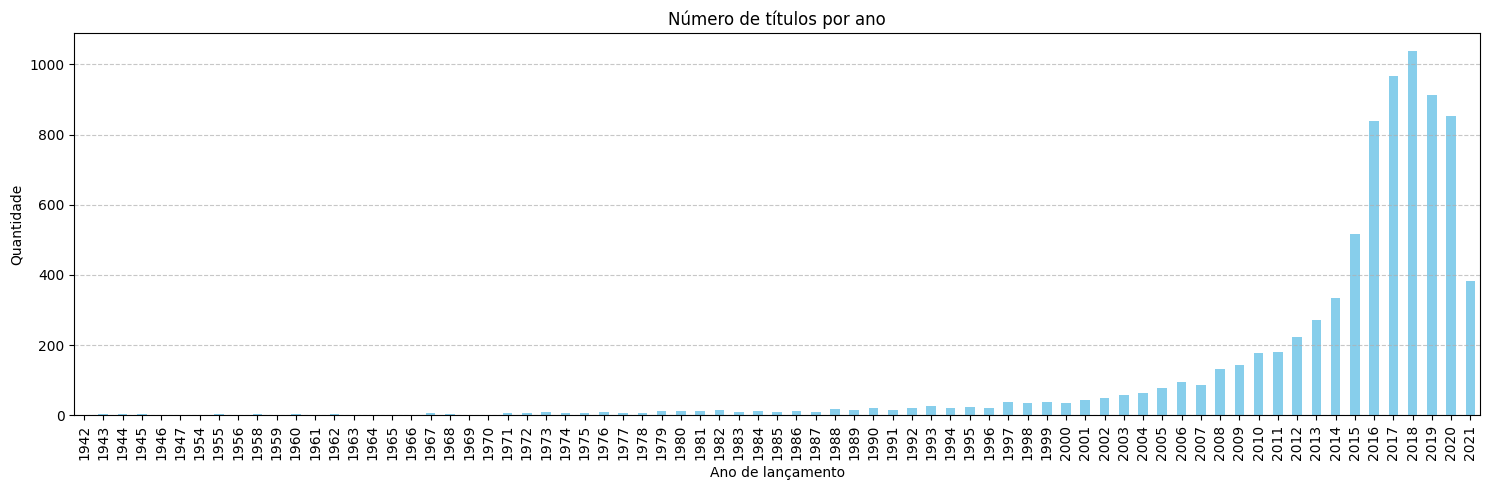

In [ ]:
# Gráfico: número de lançamentos por ano
df_year = df['release_year'].value_counts().sort_index()
df_year.plot(kind='bar', figsize=(15, 5), color='skyblue')
plt.title("Número de títulos por ano")
plt.xlabel("Ano de lançamento")
plt.ylabel("Quantidade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()